# Project Description

**Finding a nice neighborhood to live in.**

Most adults during their life, have atleast made a single change of living location due to personal or professional reasons.  However finding a decent place where all the personal needs are met is highly stressful. Some people enjoy doing the detailed analysis by hand thereby figuring out following information like, 

1. the average rent in a neighborhood, 
2. transport amenities (both public and private), 
3. best schools for kids(if they have any, as this is a very important choice), 
4. average commute time from that neighborhood to work place, 
5. nearest hospitals, 
6. crime rates, 
7. police or communal violence,
8. political or racial tensions,
9. public health crisis in the last few years, 
10. tax rates
11. public places like parks,
12. places to have leisure sctivities like going to restaurants, movie theaters, saunas, gym, etc.,

These are few common things to consider during a relocation and they are very important for a healthy and stress free life. And doing an Online search for these is time consuming. In this project, we aim to meet atleast some common requirements like **public places, parks, restaurants etc.**  and guide the project users to choose atleast 1 or more neighborhoods for their consideration during their relocation. By rating the neighborhoods based upon the available amenities they have, we can recommend the neighborhood in a city in a ranked order. This is the goal of this project. 

**Target Audience:-**  
Someone who wants to relocate to a city based on available public services.

**Stakeholders:-**
1. Someone who wants to relocate to a city.
2. Myself. 

# Data Description

We use public libraries and API's in this project. We use Wikipedia and FourSquare API, Some common Python Libraries for programming. 

### Wikipedia:-
From wikipedia pages, we can identify the neighborhood around the city. Every major cities have these information in their wiki page. We access the web page and then extract the neighborhood information. 

**Date Type:-**
XML and HTML

**Duration:-**  
< 10 seconds

**Description of the data:-**  
Location coordinates obtained by Geocoder calls.

**Source:-**
(https://en.wikipedia.org/wiki/Main_Page)

### Foursquare API:

Foursquare provides a valuable and publically accessible location information like the ameneties in  nearby locations. We use their developer tools to access the required information about the neighboords in a city. Using these accessed information we then rank the neighborhoods based on the ameneties they have. These services are free of charge. 

We create a Foursquare developer account, and after that we provide some zip codes inside a city and for each zip code or LatLon info(Latitude and Longitude Points) we provided we extract details on the ameneties we expect a neighborhood should have. So we set the radius of this search around to zip code to be around 1km. 

**Date Type:-**
JSON

**Duration:-**  
N/A

**Description of the data:-**  
Location coordinates obtained by Foursquare API calls.

**Source:-**
(https://foursquare.com/)

### Public Programming Tools:-
We use some public plotting tools like Folium to visualize the  neighborhoods in the city we want to relocate. Then based upon the analysis of the above combined information we can update the Folium visualization to reflect the number of amenities in a neighborhood. 

### K-Means Clustering Algorithm on the Data:-
We can use K-Means Clustering algorithm to group amenities in an area, then we can reduce the number of individual amenities comparisons to be done against each neighborhood. We can do these comparisons against the types of amenities, individually, collectively, or alltogether. 

# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import requests
import lxml
import folium
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image 
from IPython.core.display import HTML
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
from bs4 import BeautifulSoup

%matplotlib inline

In [2]:
# Finding the postals codes, neighborhoods in Toronto, Canada
wiki_page = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(wiki_page, 'lxml')
table = soup.find('table')
# table

toronto_table = soup.find('table',{'class':'wikitable sortable'})
links = toronto_table.findAll('td')

pincodes = []
count = 0
for x in links:
    if count == 0:
        x1 = x.text
        count += 1
    elif count == 1:
        x2 = x.text
        count +=1
    elif count == 2:
        x3 = x.text
        x3 = x3.replace('\n','')
        count = 0
        if x3 == 'Not assigned':
            x3 = x2
        if x2 != 'Not assigned':            
            pincodes.append((x1,x2,x3))
# print (pincodes)

result = {}
for x in pincodes:
    if x[0] in result:
        result[x[0]] = [x[0], x[1], result[x[0]][1] + ', ' + x[2]]
    else:
        result[x[0]] = [x[0], x[1], x[2]]
            
results = {}
for count, x in enumerate(result):
    results[count] = [x, result[x][1], result[x][2]]
    
# print(results)

toronto_data = pd.DataFrame.from_dict(results, orient='index', columns=['PostalCode', 'Borough', 'Neighborhood'])
toronto_data['latitude'] = None
toronto_data['longitude'] = None
toronto_data

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Downtown Toronto, Regent Park"
3,M6A,North York,"North York, Lawrence Manor"
4,M7A,Queen's Park,Queen's Park
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Scarborough, Malvern"
7,M3B,North York,Don Mills North
8,M4B,East York,"East York, Parkview Hill"
9,M5B,Downtown Toronto,"Downtown Toronto, Garden District"


In [22]:

toronto_data.head()

,PostalCode,Borough,Neighborhood,latitude,longitude
0,M3A,North York,Parkwoods,37.8568,-122.221
1,M4A,North York,Victoria Village,51.7302,-3.06293
2,M5A,Downtown Toronto,"Downtown Toronto, Regent Park",43.6618,-79.3568
3,M6A,North York,"North York, Lawrence Manor",43.7221,-79.4375
4,M7A,Queen's Park,Queen's Park,43.66,-79.3904


# Data Analysis

In [26]:
# Fidning the latitude and longitude of the postal codes in toronto
import geocoder
from tqdm import tqdm

# Parkwoods (37.8567738, -122.220687780045)
locations = dict()
for index, data in toronto_data.iterrows():
    address = data["Neighborhood"]
    geolocator = Nominatim(user_agent="my-application")
    location = geolocator.geocode(address)
    if location:
        locations[address] = (location.latitude, location.longitude)
        toronto_data.loc[index,'latitude'] = location.latitude
        toronto_data.loc[index,'longitude'] = location.longitude
    # print(address, (location.latitude, location.longitude))
print("Completed locations: ", len(locations))
# Some neighborhoods geolocation cannot be found due to time out errors.
# i am proceeding with available data
"""
coordinates = pd.read_csv('http://cocl.us/Geospatial_data')
coordinates.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
final_result = pd.merge(toronto_data, coordinates, on='Neighborhood')
final_result
"""

GeocoderTimedOut: Service timed out

In [27]:
print("Completed locations: ", len(locations))

Completed locations:  46


Your credentails:
CLIENT_ID: WOG0BCJ3UMIK5HM5OQOIW3ABJHVGNGKWCDA1OSPTTEE22QF0
CLIENT_SECRET:MTTEKQHQ0KL3VXWQ5A43HD4Y3OXPWYBRULM3QS1GPRAYOM2Q
(4414, 17)


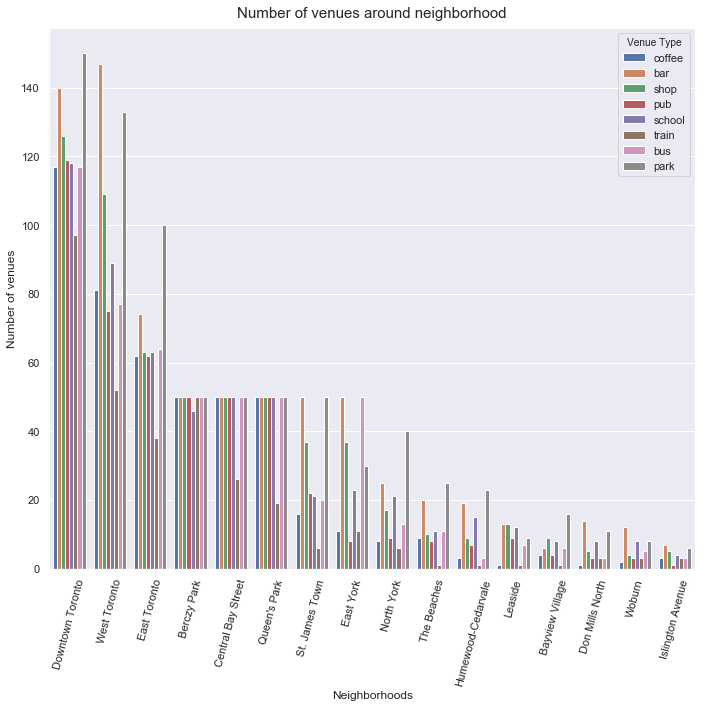

In [29]:
CLIENT_ID = 'WOG0BCJ3UMIK5HM5OQOIW3ABJHVGNGKWCDA1OSPTTEE22QF0'
CLIENT_SECRET = 'MTTEKQHQ0KL3VXWQ5A43HD4Y3OXPWYBRULM3QS1GPRAYOM2Q'
VERSION = '20180605'

import warnings
warnings.filterwarnings('ignore')

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
    
search_queries = ['coffee', 'bar', 'shop', 'pub', 'school', 'train', 'bus', 'park']
radius = 1000
LIMIT = 50

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# Fidnign al  the public places available near the geo locations
data = pd.DataFrame()

for neighborhood, location in locations.items():
    temp = pd.DataFrame()
    try:
        for query in search_queries:
            url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, location[0], location[1], VERSION, query, radius, LIMIT)
            results = requests.get(url).json()
            venues = results['response']['venues']
            dataframe = json_normalize(venues)
            filtered_columns = ['name', 'categories', 'id'] + [col for col in dataframe.columns if col.startswith('location.')]
            dataframe_filtered = dataframe.loc[:, filtered_columns]
            dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)
            dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
            dataframe_filtered['query'] = query
            temp = pd.concat([temp, dataframe_filtered])
        temp['neighborhood'] = neighborhood
        data = pd.concat([data, temp])
    except:
        continue

print(data.shape)
data.head()

data['neighborhood'] = data['neighborhood'].apply(lambda x: x.split(',')[0])
data.rename(columns={'query': 'Venue Type'}, inplace = True)

sns.set(style='darkgrid')
plt.figure(figsize=(10,10))
neighborhoods = data['neighborhood'].apply(lambda x: x.split(',')[0])
sns.countplot(neighborhoods, data = data, hue = 'Venue Type', order = neighborhoods.value_counts().index)
plt.xticks(rotation=75)
plt.title('Number of venues around neighborhood', pad=10, fontsize = 15)
plt.ylabel('Number of venues')
plt.xlabel('Neighborhoods')
plt.tight_layout()

In [32]:
# Choosing the top two neighborhood by using visual analysis of the above graph
dtoronto = data[data['neighborhood'].apply(lambda x: 'Downtown Toronto' in x)]
dtoronto.head()

,address,categories,cc,city,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,neighborhood,postalCode,Venue Type,state
0,479 Broadview Ave,Café,CA,Toronto,Canada,at Riverdale Ave,878,"[479 Broadview Ave (at Riverdale Ave), Toronto...",4b4626fef964a5204a1826e3,"[{'label': 'display', 'lat': 43.66917710774420...",43.669177,-79.353134,Rooster Coffee House,Downtown Toronto,M4K 2N4,coffee,ON
1,519 Parliament St.,Coffee Shop,CA,Toronto,Canada,btwn Carlton & Winchester,1006,[519 Parliament St. (btwn Carlton & Winchester...,4ad79243f964a5204c0c21e3,"[{'label': 'display', 'lat': 43.66529519392083...",43.665295,-79.368335,Jetfuel Coffee,Downtown Toronto,M4X 1P3,coffee,ON
2,354 Queen St. E,Café,CA,Toronto,Canada,Parliament St.,892,"[354 Queen St. E (Parliament St.), Toronto ON,...",4b3cfbb5f964a5201e8b25e3,"[{'label': 'display', 'lat': 43.65569238507361...",43.655692,-79.364095,Redline Coffee and Espresso,Downtown Toronto,NaN,coffee,ON
3,2 Matilda St,Coffee Shop,CA,Toronto,Canada,NaN,283,"[2 Matilda St, Toronto ON, Canada]",502652fee4b0e6861eab1f29,"[{'label': 'display', 'lat': 43.65998618830547...",43.659986,-79.354299,Merchants of Green Coffee,Downtown Toronto,NaN,coffee,ON
4,589 King St East,Coffee Shop,CA,Toronto,Canada,River,572,"[589 King St East (River), Toronto ON M5V 1M1,...",544ad85d498ebace721e3660,"[{'label': 'display', 'lat': 43.6566309, 'lng'...",43.656631,-79.356240,Tim Hortons Coffee House,Downtown Toronto,M5V 1M1,coffee,ON


In [34]:
wtoronto = data[data['neighborhood'].apply(lambda x: 'West Toronto' in x)]
wtoronto.head()

,address,categories,cc,city,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,neighborhood,postalCode,Venue Type,state
0,50 Wade Ave,Café,CA,Toronto,Canada,at Jenet Ave,758,"[50 Wade Ave (at Jenet Ave), Toronto ON M6H 2X...",52fa752e498e0d3da559ae41,"[{'label': 'display', 'lat': 43.65947936946201...",43.659479,-79.445086,Propeller Coffee Co.,West Toronto,M6H 2X3,coffee,ON
1,NaN,Café,CA,NaN,Canada,NaN,501,[Canada],55f5b7c6498ea00cba57659c,"[{'label': 'display', 'lat': 43.65856407243921...",43.658564,-79.441520,coffee & guitars,West Toronto,NaN,coffee,NaN
2,983 Dovercourt Rd.,Coffee Shop,CA,Toronto,Canada,Hallam St.,822,"[983 Dovercourt Rd. (Hallam St.), Toronto ON, ...",528bc5a111d20301cc84ceaa,"[{'label': 'display', 'lat': 43.66693153385268...",43.666932,-79.431510,Hub Coffee Shop,West Toronto,NaN,coffee,ON
3,1287 Bloor St W,Coffee Shop,CA,Toronto,Canada,at Lansdowne Ave,592,"[1287 Bloor St W (at Lansdowne Ave), Toronto O...",4be328e521d5a593df5a1811,"[{'label': 'display', 'lat': 43.65838473226978...",43.658385,-79.442639,Coffee Time,West Toronto,M6H 1N7,coffee,ON
4,NaN,Hookah Bar,CA,NaN,Canada,NaN,332,[Canada],51f5d805498e7ce0724f51a7,"[{'label': 'display', 'lat': 43.661762, 'lng':...",43.661762,-79.432205,Shisha Lounge and Coffee House,West Toronto,NaN,coffee,NaN


## Visulaization of the Neighborhoods in Toronto

In [38]:
general_location = geolocator.geocode('Toronto')

venues_map = folium.Map(location=[43.653908, -79.384293], zoom_start=5)

for neighborhood, location in locations.items():
    folium.CircleMarker(
        [location[0], location[1]],
        radius=5,
        color='red',
        popup=neighborhood,
        fill = True,
        fill_color = 'red',
        fill_opacity = 0.6
    ).add_to(venues_map)
    
venues_map

In [39]:
def get_categories(categories):
    out = []
    for i in categories:
        out.append(i['name'])
    return ', '.join(i for i in out)

def get_open_days(timeframes):
    return len(timeframes)

def get_avg_hours_open(timeframes):
    h = 0
    pm = [24, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
    for i in timeframes:
        hours = i['open'][0]['renderedTime'].split('–')
        start = hours[0]
        end = hours[1]
        h += pm[int(end.split(':')[0])] - int(start.split(':')[0])
    return round(h / len(timeframes), 1)

def get_comments(tips):
    out = []
    for i in tips:
        out.append(i['text'])
    return ' '.join(i for i in out)
    
def get_rating(venue):
    try:
        out = venue['rating']
    except:
        out = 'No rating yet.'
    return out

def explore_venues(df):
    results = []

    for id in df['id']:
        try:
            url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(id, CLIENT_ID, CLIENT_SECRET, VERSION)
            venue = requests.get(url).json()['response']['venue']
            name = venue['name']
            city = venue['location']['city']
            state = venue['location']['state']
            categories = get_categories(venue['categories'])
            verified = 1 if venue['verified'] == 'True' else 0
            likes = venue['likes']['count']
            rating = get_rating(venue)
            photos = venue['photos']['count']
            tips = venue['tips']['count']
            open_days = get_open_days(venue['popular']['timeframes'])
            avg_hours_open = get_avg_hours_open(venue['popular']['timeframes'])
            comments = get_comments(venue['tips']['groups'][0]['items'])
            results.append([id, name, city, state, categories, verified, likes, rating, photos, tips, open_days, avg_hours_open, comments])
        except:
            continue
    return results

# Clustering

In [ ]:
r = explore_venues(data)
clustering_df = pd.DataFrame.from_records(r, columns=['id', 'name', 'city', 'state', 'categories', 'verified',
                                                      'likes', 'rating', 'photos', 'tips', 'open_days',
                                                      'avg_hours_open', 'comments'])
clustering_df.head()

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clustering_df['comments'])
clustering_df['comments'] = pd.Series(list(X.toarray()))

data_to_cluster = pd.get_dummies(data[['id', 'categories', 'Venue Type']], columns=['categories', 'Venue Type'], prefix = '', prefix_sep='')
data_to_cluster = data_to_cluster.merge(clustering_df[['id', 'verified', 'likes', 'rating', 'photos', 'tips', 'open_days', 'avg_hours_open']],
                                          how='left', left_on='id', right_on='id').drop('id', axis = 1).fillna(method='pad').fillna(0)
data_to_cluster.head()

kclusters = 2

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(data_to_cluster)

kmeans.labels_[0:10]
data_to_cluster['Cluster Labels'] = kmeans.labels_
data_to_cluster[data_to_cluster['Cluster Labels'] == 1].head(2)
data_to_cluster[data_to_cluster['Cluster Labels'] == 0].head(2)

# Result

Downtown Toronto has more places in Toroto when compared to West Toronto. So when a person wants to relocate based upon all the avilable amenities they can recognize that Downtown Toronto is the best of all the avilable options.